In [419]:
import numpy as np
from copy import deepcopy
import os
MAX_KEY = int(1e8)

# NUM_CONSTRUCTION_INSERTION = int(1e5)
NUM_OPERATIONS = [int(1e4), int(5e4), int(1e5), int(5e5), int(1e6)]
SET_TYPES = ["A-I", "A-D", "A-S", "B-I", "B-D", "B-S", "R"]
WEIGHTS = [
    [0.10, 0.45, 0.45],
    [0.45, 0.10, 0.45],
    [0.45, 0.45, 0.10],
    [0.80, 0.10, 0.10],
    [0.10, 0.80, 0.10],
    [0.10, 0.10, 0.80],
    [0.33, 0.33, 0.34],
]

# create all necessary directories
if not os.path.exists(f"testsets"):
    os.mkdir(f"testsets")
for set_type in SET_TYPES:
    # create top directories
    if not os.path.exists(f'testsets/{set_type}'):
        os.mkdir(f'testsets/{set_type}')
    for n_operations in NUM_OPERATIONS:
        if not os.path.exists(f"testsets/{set_type}/{n_operations}"):
            os.mkdir(f"testsets/{set_type}/{n_operations}")

In [ ]:
# Create datasets
# WARNING: this code takes a very long time to complete. 
# Expect it to take at least 12 hours or use parallelization.
for set_type, weights in zip(SET_TYPES, WEIGHTS):
    for n_operations in NUM_OPERATIONS:
        for n_iter in range(1, 6):
            print(f"testsets/{set_type}/{n_operations}/iter_{n_iter}.txt")
            # generate the construction insertions
            existing_keys = np.random.choice(
                np.arange(MAX_KEY) + 1,
                size=n_operations,
                # size=10,
                replace=False
            )
            sequence = [f"i {key}" for key in existing_keys]
            for _ in range(n_operations):
                operation = np.random.choice(a=3, p=weights)
                if (operation == 0):
                    # if insertion
                    key = np.random.randint(MAX_KEY) + 1
                    # make sure to append the key to existing_keys
                    np.append(existing_keys, key)
                    sequence.append(f"i {key}")
                elif (operation == 1):
                    # if deletion, choose the key to insert from existing_keys
                    key = np.random.choice(existing_keys)
                    # make sure to remove the key from existing_keys
                    np.delete(existing_keys, np.where(existing_keys == key))
                    sequence.append(f"d {key}")
                elif (operation == 2):
                    # if search
                    key = np.random.randint(MAX_KEY) + 1
                    sequence.append(f"s {key}")
            with open(f"testsets/{set_type}/{n_operations}/iter_{n_iter}.txt", "w") as f:
                for item in sequence:
                    f.write(f"{item}\n")
        

In [259]:
NUM_OPERATIONS

[10000, 50000, 100000, 500000, 1000000, 5000000]

In [412]:
# Create ST-1-U, ST-1-N
for set_type in ["ST-1-U", "ST-1-N"]:
    # create top directories
    if not os.path.exists(f'testsets/{set_type}'):
        os.mkdir(f'testsets/{set_type}')
    for n_operations in NUM_OPERATIONS:
        n_operations *= 10
        if not os.path.exists(f"testsets/{set_type}/{n_operations}"):
            os.mkdir(f"testsets/{set_type}/{n_operations}")

            
# ST-1-N
for n_operations in NUM_OPERATIONS:
    n_operations *= 10
    MAX_KEY = int(n_operations / 10)
    for n_iter in range(1, 6):
        print(f"testsets/ST-1-N/{n_operations}/iter_{n_iter}.txt")

        # generate float normal random variables and multiply by MAX_KEY
        samples = np.random.normal(size = n_operations) * MAX_KEY
        # convert to int
        samples -= samples.min()
        samples = np.array(list(map(int, samples)))
        # notmalize the values to make sure it is in the range of [0, MAX_KEY]
        samples = MAX_KEY * samples / samples.max()
        samples = np.array(list(map(int, samples)))

        # convert to search query and save as .txt file
        with open(f"testsets/ST-1-N/{n_operations}/iter_{n_iter}.txt", "w") as f:
            for item in np.random.permutation(np.unique(samples)):
                f.write(f"i {item}\n")
            for item in samples:
                f.write(f"s {item}\n")
    

testsets/ST-1-N/100000/iter_1.txt
testsets/ST-1-N/100000/iter_2.txt
testsets/ST-1-N/100000/iter_3.txt
testsets/ST-1-N/100000/iter_4.txt
testsets/ST-1-N/100000/iter_5.txt
testsets/ST-1-N/500000/iter_1.txt
testsets/ST-1-N/500000/iter_2.txt
testsets/ST-1-N/500000/iter_3.txt
testsets/ST-1-N/500000/iter_4.txt
testsets/ST-1-N/500000/iter_5.txt
testsets/ST-1-N/1000000/iter_1.txt
testsets/ST-1-N/1000000/iter_2.txt
testsets/ST-1-N/1000000/iter_3.txt
testsets/ST-1-N/1000000/iter_4.txt
testsets/ST-1-N/1000000/iter_5.txt
testsets/ST-1-N/5000000/iter_1.txt
testsets/ST-1-N/5000000/iter_2.txt
testsets/ST-1-N/5000000/iter_3.txt
testsets/ST-1-N/5000000/iter_4.txt
testsets/ST-1-N/5000000/iter_5.txt
testsets/ST-1-N/10000000/iter_1.txt
testsets/ST-1-N/10000000/iter_2.txt
testsets/ST-1-N/10000000/iter_3.txt
testsets/ST-1-N/10000000/iter_4.txt
testsets/ST-1-N/10000000/iter_5.txt


In [413]:
# ST-1-U
for n_operations in NUM_OPERATIONS:
    n_operations *= 10
    MAX_KEY = int(n_operations / 10)
    for n_iter in range(1, 6):
        print(f"testsets/ST-1-U/{n_operations}/iter_{n_iter}.txt")

        # generate float normal random variables and multiply by MAX_KEY
        samples = np.random.random(size = n_operations) * MAX_KEY
        # convert to int
        samples -= samples.min()
        samples = np.array(list(map(int, samples)))
        # notmalize the values to make sure it is in the range of [0, MAX_KEY]
        samples = MAX_KEY * samples / samples.max()
        samples = np.array(list(map(int, samples)))

        # convert to search query and save as .txt file
        with open(f"testsets/ST-1-U/{n_operations}/iter_{n_iter}.txt", "w") as f:
            for item in np.random.permutation(np.unique(samples)):
                f.write(f"i {item}\n")
            for item in samples:
                f.write(f"s {item}\n")

testsets/ST-1-U/100000/iter_1.txt
testsets/ST-1-U/100000/iter_2.txt
testsets/ST-1-U/100000/iter_3.txt
testsets/ST-1-U/100000/iter_4.txt
testsets/ST-1-U/100000/iter_5.txt
testsets/ST-1-U/500000/iter_1.txt
testsets/ST-1-U/500000/iter_2.txt
testsets/ST-1-U/500000/iter_3.txt
testsets/ST-1-U/500000/iter_4.txt
testsets/ST-1-U/500000/iter_5.txt
testsets/ST-1-U/1000000/iter_1.txt
testsets/ST-1-U/1000000/iter_2.txt
testsets/ST-1-U/1000000/iter_3.txt
testsets/ST-1-U/1000000/iter_4.txt
testsets/ST-1-U/1000000/iter_5.txt
testsets/ST-1-U/5000000/iter_1.txt
testsets/ST-1-U/5000000/iter_2.txt
testsets/ST-1-U/5000000/iter_3.txt
testsets/ST-1-U/5000000/iter_4.txt
testsets/ST-1-U/5000000/iter_5.txt
testsets/ST-1-U/10000000/iter_1.txt
testsets/ST-1-U/10000000/iter_2.txt
testsets/ST-1-U/10000000/iter_3.txt
testsets/ST-1-U/10000000/iter_4.txt
testsets/ST-1-U/10000000/iter_5.txt


In [415]:
# obtain standard deviation of the number of insertion
for n_operations in NUM_OPERATIONS:
    n_operations *= 10
    MAX_KEY = int(n_operations / 10)
    num_unique = []
    for n_iter in range(10):
        # print(f"testsets/ST-1-N/{n_operations}/iter_{n_iter}.txt")

        # generate float normal random variables and multiply by MAX_KEY
        samples = np.random.random(size = n_operations) * MAX_KEY
        # convert to int
        samples -= samples.min()
        samples = np.array(list(map(int, samples)))
        # notmalize the values to make sure it is in the range of [0, MAX_KEY]
        samples = MAX_KEY * samples / samples.max()
        samples = np.array(list(map(int, samples)))
        
        num_unique.append(len(np.unique(samples)))
    std = np.std(num_unique)
    print("{:.2f} as opposed {}".format(std, n_operations))
    print("ratio: {:.2f}%".format(100*std/n_operations))

0.90 as opposed 100000
ratio: 0.00%
1.50 as opposed 500000
ratio: 0.00%
1.56 as opposed 1000000
ratio: 0.00%
5.22 as opposed 5000000
ratio: 0.00%
6.46 as opposed 10000000
ratio: 0.00%


In [417]:
# obtain standard deviation of the number of insertion
for n_operations in NUM_OPERATIONS:
    n_operations *= 10
    MAX_KEY = int(n_operations / 10)
    num_unique = []
    for n_iter in range(10):
        # print(f"testsets/ST-1-N/{n_operations}/iter_{n_iter}.txt")

        # generate float normal random variables and multiply by MAX_KEY
        samples = np.random.normal(size = n_operations) * MAX_KEY
        # convert to int
        samples -= samples.min()
        samples = np.array(list(map(int, samples)))
        # notmalize the values to make sure it is in the range of [0, MAX_KEY]
        samples = MAX_KEY * samples / samples.max()
        samples = np.array(list(map(int, samples)))
        
        num_unique.append(len(np.unique(samples)))
    std = np.std(num_unique)
    print("{:.2f} as opposed {}".format(std, n_operations))
    print("ratio: {:.2f}%".format(100*std/n_operations))

170.09 as opposed 100000
ratio: 0.17%
751.14 as opposed 500000
ratio: 0.15%
1236.81 as opposed 1000000
ratio: 0.12%
8321.44 as opposed 5000000
ratio: 0.17%
12080.69 as opposed 10000000
ratio: 0.12%


In [475]:
# create H testset
if not os.path.exists(f'testsets/H'):
    os.mkdir(f'testsets/H')
    for n_operations in NUM_OPERATIONS:
        n_operations = int(n_operations / 10)
        if not os.path.exists(f"testsets/H/{n_operations}"):
            os.mkdir(f"testsets/H/{n_operations}")

for n_operations in NUM_OPERATIONS:
    n_operations = int(n_operations / 10)
    for n_iter in range(1,6):
        existing_keys = np.random.choice(
            np.arange(MAX_KEY) + 1,
            size=n_operations,
            # size=10,
            replace=False
        )
        sequence = [f"i {key}" for key in existing_keys]
        # insert search operations
        for _ in range(n_operations):
            key = np.random.randint(MAX_KEY) + 1
            sequence.append(f"s {key}")
        with open(f"testsets/H/{n_operations}/iter_{n_iter}.txt", "w") as f:
            for item in sequence:
                f.write(f"{item}\n")

In [ ]:
# plot the result
# A-I
st = [0.00923, 0.05510, 0.11771, 0.84781, 2.20048]
rbt = [0.00496, 0.02978, 0.06179, 0.47644, 1.28681]
treap = [0.00669, 0.03795, 0.08346, 0.63568, 1.78370]
fig, ax = plt.subplots(1)
ax.set_title("runtime on A-I test sets")
st = ax.plot(st, label="ST")
rbt = ax.plot(rbt, label="RBT")
treap = ax.plot(treap, label="Treap")
ax.set_ylabel('runtime (sec)')
ax.set_xlabel('# of operations')
ax.set_xticks(range(5))
ax.set_xticklabels(["1e4", "5e4", "1e5", "5e5", "1e6"])
ax.legend()
fig.savefig("plots/A-I.png")

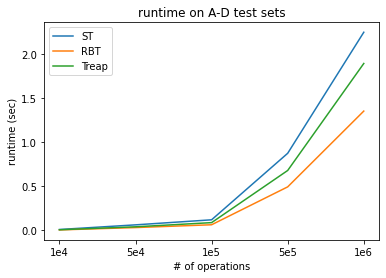

In [444]:
# plot the result
set_type = "A-D"
st = [0.00985, 0.06240, 0.11975, 0.87368, 2.24603]
rbt = [0.00503, 0.03157, 0.06345, 0.49305, 1.35222]
treap = [0.00673, 0.04038, 0.08767, 0.67893, 1.89190]
fig, ax = plt.subplots(1)
ax.set_title(f"runtime on {set_type} test sets")
st = ax.plot(st, label="ST")
rbt = ax.plot(rbt, label="RBT")
treap = ax.plot(treap, label="Treap")
ax.set_ylabel('runtime (sec)')
ax.set_xlabel('# of operations')
ax.set_xticks(range(5))
ax.set_xticklabels(["1e4", "5e4", "1e5", "5e5", "1e6"])
ax.legend()
fig.savefig(f"plots/{set_type}.png")

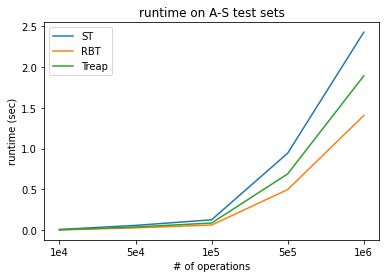

In [445]:
# plot the result
set_type = "A-S"
st = [0.01050, 0.06037, 0.12897, 0.94378, 2.42256]
rbt = [0.00518, 0.03007, 0.06486, 0.49834, 1.40390]
treap = [0.00685, 0.04111, 0.08927, 0.69063, 1.88926]
fig, ax = plt.subplots(1)
ax.set_title(f"runtime on {set_type} test sets")
st = ax.plot(st, label="ST")
rbt = ax.plot(rbt, label="RBT")
treap = ax.plot(treap, label="Treap")
ax.set_ylabel('runtime (sec)')
ax.set_xlabel('# of operations')
ax.set_xticks(range(5))
ax.set_xticklabels(["1e4", "5e4", "1e5", "5e5", "1e6"])
ax.legend()
fig.savefig(f"plots/{set_type}.png")

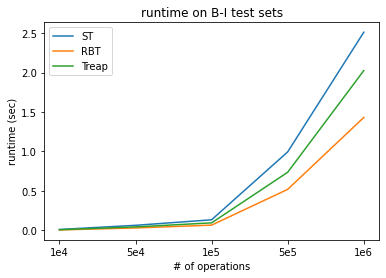

In [446]:
# plot the result
set_type = "B-I"
st = [0.01084, 0.06353, 0.13345, 0.99452, 2.51149]
rbt = [0.00520, 0.03006, 0.06602, 0.51946, 1.43099]
treap = [0.00742, 0.04346, 0.09474, 0.73610, 2.02541]
fig, ax = plt.subplots(1)
ax.set_title(f"runtime on {set_type} test sets")
st = ax.plot(st, label="ST")
rbt = ax.plot(rbt, label="RBT")
treap = ax.plot(treap, label="Treap")
ax.set_ylabel('runtime (sec)')
ax.set_xlabel('# of operations')
ax.set_xticks(range(5))
ax.set_xticklabels(["1e4", "5e4", "1e5", "5e5", "1e6"])
ax.legend()
fig.savefig(f"plots/{set_type}.png")

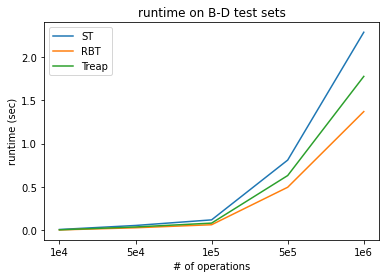

In [447]:
# plot the result
set_type = "B-D"
st = [0.01001, 0.05640, 0.12088, 0.80977, 2.28278]
rbt = [0.00514, 0.02987, 0.06478, 0.49670, 1.36869]
treap = [0.00634, 0.03915, 0.08345, 0.63164, 1.77410]
fig, ax = plt.subplots(1)
ax.set_title(f"runtime on {set_type} test sets")
st = ax.plot(st, label="ST")
rbt = ax.plot(rbt, label="RBT")
treap = ax.plot(treap, label="Treap")
ax.set_ylabel('runtime (sec)')
ax.set_xlabel('# of operations')
ax.set_xticks(range(5))
ax.set_xticklabels(["1e4", "5e4", "1e5", "5e5", "1e6"])
ax.legend()
fig.savefig(f"plots/{set_type}.png")

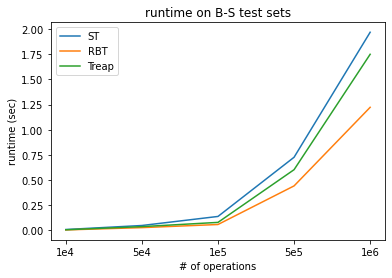

In [448]:
# plot the result
set_type = "B-S"
st = [0.00856, 0.04853, 0.13849, 0.72670, 1.96912]
rbt = [0.00462, 0.02730, 0.05842, 0.44207, 1.22312]
treap = [0.00600, 0.03735, 0.07942, 0.60326, 1.75011]
fig, ax = plt.subplots(1)
ax.set_title(f"runtime on {set_type} test sets")
st = ax.plot(st, label="ST")
rbt = ax.plot(rbt, label="RBT")
treap = ax.plot(treap, label="Treap")
ax.set_ylabel('runtime (sec)')
ax.set_xlabel('# of operations')
ax.set_xticks(range(5))
ax.set_xticklabels(["1e4", "5e4", "1e5", "5e5", "1e6"])
ax.legend()
fig.savefig(f"plots/{set_type}.png")

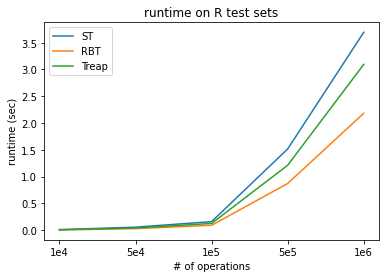

In [449]:
# plot the result
set_type = "R"
st = [0.01022, 0.05643, 0.15934, 1.51703, 3.69557]
rbt = [0.00481, 0.02917, 0.09078, 0.87181, 2.18381]
treap = [0.00665, 0.03974, 0.12574, 1.21233, 3.09596]
fig, ax = plt.subplots(1)
ax.set_title(f"runtime on {set_type} test sets")
st = ax.plot(st, label="ST")
rbt = ax.plot(rbt, label="RBT")
treap = ax.plot(treap, label="Treap")
ax.set_ylabel('runtime (sec)')
ax.set_xlabel('# of operations')
ax.set_xticks(range(5))
ax.set_xticklabels(["1e4", "5e4", "1e5", "5e5", "1e6"])
ax.legend()
fig.savefig(f"plots/{set_type}.png")

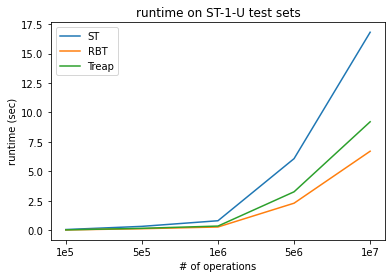

In [469]:
# plot the result
set_type = "ST-1-U"
st = [0.05034, 0.31999, 0.79713, 6.07154, 16.80519]
rbt = [0.01826, 0.12031, 0.26622, 2.28748, 6.70182]
treap = [0.02194, 0.15435, 0.34468, 3.25561, 9.20193]
fig, ax = plt.subplots(1)
ax.set_title(f"runtime on {set_type} test sets")
st = ax.plot(st, label="ST")
rbt = ax.plot(rbt, label="RBT")
treap = ax.plot(treap, label="Treap")
ax.set_ylabel('runtime (sec)')
ax.set_xlabel('# of operations')
ax.set_xticks(range(5))
ax.set_xticklabels(["1e5", "5e5", "1e6", "5e6", "1e7"])
ax.legend()
fig.savefig(f"plots/{set_type}.png")

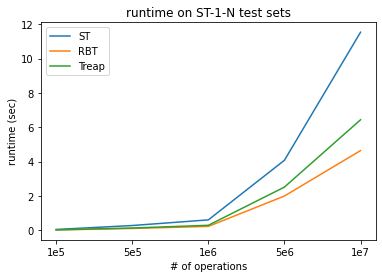

In [470]:
# plot the result
set_type = "ST-1-N"
st = [0.04171, 0.27123, 0.60012, 4.07358, 11.53170]
rbt = [0.01542, 0.10010, 0.22021, 1.99040, 4.63778]
treap = [0.01810, 0.12602, 0.28442, 2.51102, 6.43211]
fig, ax = plt.subplots(1)
ax.set_title(f"runtime on {set_type} test sets")
st = ax.plot(st, label="ST")
rbt = ax.plot(rbt, label="RBT")
treap = ax.plot(treap, label="Treap")
ax.set_ylabel('runtime (sec)')
ax.set_xlabel('# of operations')
ax.set_xticks(range(5))
ax.set_xticklabels(["1e5", "5e5", "1e6", "5e6", "1e7"])
ax.legend()
fig.savefig(f"plots/{set_type}.png")

In [478]:
from subprocess import check_output
def run_command(command):
    # print(command)
    return check_output(command.split(' '))

top_dir = "testsets"
TREE_TYPES = ["st", "rbt", "treap"]

# Run analysis on "H"
set_type = "H"
NUM_OPERATIONS = ["1000", "5000", "10000", "50000", "100000"]
NUM_OPERATIONS = ["100000"]
TREE_TYPES = ["rbt"]
for n_operations in NUM_OPERATIONS:
    for tree_type in TREE_TYPES:
        print(f"{set_type}-{n_operations}:{tree_type}")
        heights = 0;
        for n_iter in range(1, 6):
            if tree_type == "treap":
                # if treap, run five times because height is non-deterministic
                for _ in range(5):
                    res = run_command(f"./{tree_type} testsets/{set_type}/{n_operations}/iter_{n_iter}.txt")
                    height = res.decode("utf-8").split()[11]
                    heights += int(height)
            else:
                # if rbt or st, the tree is deterministic per instance
                res = run_command(f"./{tree_type} testsets/{set_type}/{n_operations}/iter_{n_iter}.txt")
                height = res.decode("utf-8").split()[11]
                heights += int(height)
        if tree_type == "treap":
            # print("AVG: {:.2f}".format(heights/25))
            print("AVG: {:.2f}".format(heights/25))
        else:
            # print("AVG: {:.2f}".format(heights/5))
            print("AVG: {:2f}".format(heights/5))

H-100000:rbt
AVG: 20.200000
